In [ ]:
%matplotlib inline


import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import seaborn as sns
import matplotlib.pylab as plt


In [ ]:
session_times = pd.read_csv('web_page_data.csv')

#Converting to milliseconds
session_times.Time = 100 * session_times.Time

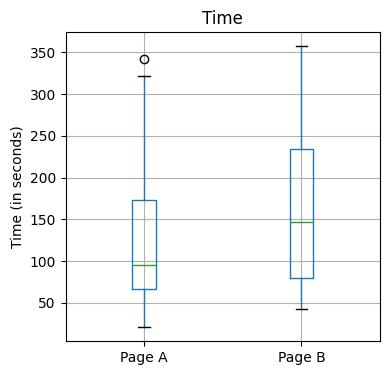

In [ ]:
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout() #Adjusts the layout of the plot to ensure that all elements (titles, labels, and axes) fit within the figure area without overlapping.
plt.show()

Same but with seaborn cuz why not?

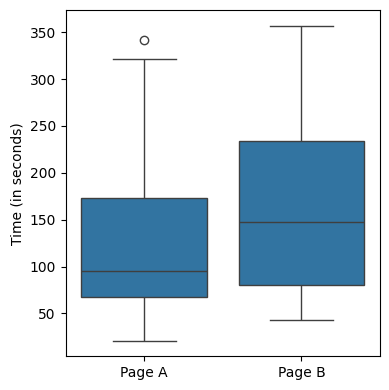

In [ ]:
# Create the boxplot
plt.figure(figsize=(4, 4))  # Set figure size
sns.boxplot(x='Page', y='Time', data=session_times)

# Customize the plot
plt.xlabel('')  # Remove x-axis label
plt.ylabel('Time (in seconds)')  # Add y-axis label
plt.title('')  # Remove the default title
plt.tight_layout()  # Adjust layout
plt.show()  # Render the plot

 -> According to the boxplot page B leads to longer sessions than
 page A or in other words **people spend more time on page B**

In [ ]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(abs(mean_b - mean_a))

35.66666666666667


 -> Page B has session times that are greater than those of page A by 35.67 seconds, on
 average.

 The question is whether this difference is statistically significant or within the range of what random
 chance might produce.

In [ ]:
# Permutation test function
def perm_fun(x, nA, nB):
  #x: A pandas Series containing the data
  #nA: The number of observations in Group A
  #nB: The number of observations in Group B

    n = nA + nB #the total number of observations across both groups.
    idx_B = set(random.sample(range(n), nB)) #Randomly selects nB indices from the combined dataset to simulate Group B
    idx_A = set(range(n)) - idx_B            #The remaining indices, are assigned to Group A.
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()  # returns the difference in means between Group B and Group A.

nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]


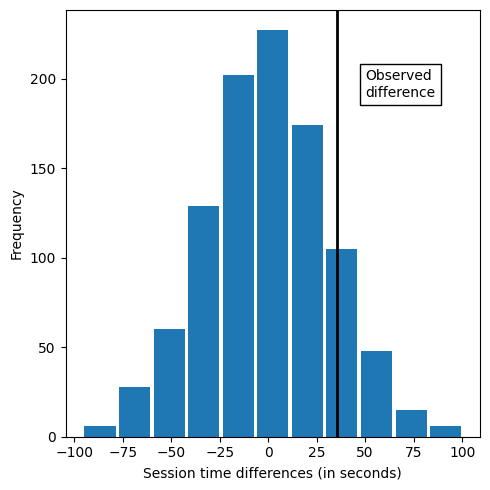

In [ ]:
random.seed(1) #this is so the code can consistently produce the same results every time.
#Calling this function R = 1,000 times
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

#plot distribution of differences in the session times
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

 The histogram, shows that mean difference of random permutations often exceeds the observed difference in session times (the vertical line).


 For our results, this happens in 12.1% of the cases:

In [ ]:
# convert perm_diffs to numpy array to avoid problems with some Python installations
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_b - mean_a))

0.121


p-value = 0.121 thus we fail to reject the null hypothesis H0 => the observed difference in session time between page A and page B is not statistically significant.